Можно сделать лейблы сентимент анализа и посмотреть, что чаще выражает инсубординация

In [ ]:
import os
import re
import nltk
import pandas as pd
import codecs
from nltk.tokenize import sent_tokenize
from tqdm.auto import tqdm
nltk.download('punkt')

!pip install stanza
import stanza
stanza.download('fr') # download French model
nlp_stanza = stanza.Pipeline('fr') # initialize French neural pipeline

!pip install --upgrade spicy
!python -m spacy download fr_core_news_md
import fr_core_news_md
nlp = fr_core_news_md.load()


!pip install benepar
from nltk import Tree
import benepar
benepar.download('benepar_fr2')
import warnings
warnings.filterwarnings("ignore")
import spacy
from benepar.spacy_plugin import BeneparComponent
nlp.add_pipe(BeneparComponent('benepar_fr2'))

In [ ]:
list_of_paths = []

for root, dirs, files in os.walk("/content/drive/MyDrive/ВКР/proga/DATA/supernatural"):
    for name in files:
        path = str(root + '/' +  name)
        list_of_paths.append(path)
        #print(os.path.join(root, name))

len(list_of_paths)

211

In [ ]:
def check_unicode(path):
  encodings = ['utf-8', 'windows-1252', 'windows-1250'] # add more
  for e in encodings:
    try:
      fh = codecs.open(path, 'r', encoding=e)
      fh.readlines()
      fh.seek(0)
    except UnicodeDecodeError:
      pass
        #print('got unicode error with %s , trying different encoding' % e)
    else:
      return e 
      break 

In [ ]:
def make_dataframe(list_of_path):
  data = pd.DataFrame()
  sentences = []
  for path in list_of_path:
    text = []
    encoding = check_unicode(path)
    with open(path,'r', encoding=encoding) as f: 
      lines = f.readlines()
    for x in lines:
      if not re.search(r'[a-zA-Z]', x):
        pass
      else:
        x = re.sub(r'\d\d:\d\d:\d\d,\d\d\d --> \d\d:\d\d:\d\d,\d\d\d  X\d:\d\d\d X\d:\d\d\d Y\d:\d\d\d Y\d:\d\d\d', r'', x)
        x = x.replace('...', ' ')
        if len(x) > 1:
          text.append(x.replace('\n',''))
    sentences = sentences +  sent_tokenize(' '.join(text))
  data['sentences'] = sentences
  return data

sentences = make_dataframe(list_of_path = list_of_paths)

In [ ]:
sentences.head()

,sentences
0,ALORS - Qui êtes-vous ?
1,- Castiel.
2,Je suis un ange du Seigneur.
3,Le symbole que vous avez vu est la résurrectio...
4,Il est dans une ancienne prophétie.


In [7]:
dependence = []
for i, text in tqdm(enumerate(sentences.sentences)):
  doc = nlp_stanza(text)
  list_doc = doc.to_dict()
  dependence.append(list_doc)
sentences['dependence_structure'] = dependence 

sentences.to_csv('/content/drive/MyDrive/ВКР/proga/DATA/supernatural_dependency.csv', index=False)
sentences.head()

,sentences,dependence_structure
0,ALORS - Qui êtes-vous ?,"[[{'id': 1, 'text': 'ALORS', 'lemma': 'alors',..."
1,- Castiel.,"[[{'id': 1, 'text': '-', 'lemma': '-', 'upos':..."
2,Je suis un ange du Seigneur.,"[[{'id': 1, 'text': 'Je', 'lemma': 'il', 'upos..."
3,Le symbole que vous avez vu est la résurrectio...,"[[{'id': 1, 'text': 'Le', 'lemma': 'le', 'upos..."
4,Il est dans une ancienne prophétie.,"[[{'id': 1, 'text': 'Il', 'lemma': 'il', 'upos..."


In [3]:
import pandas as pd
sentences = pd.read_csv('/content/drive/MyDrive/ВКР/proga/DATA/supernatural_dependency.csv')
sentences

,sentences,dependence_structure
0,ALORS - Qui êtes-vous ?,"[[{'id': 1, 'text': 'ALORS', 'lemma': 'alors',..."
1,- Castiel.,"[[{'id': 1, 'text': '-', 'lemma': '-', 'upos':..."
2,Je suis un ange du Seigneur.,"[[{'id': 1, 'text': 'Je', 'lemma': 'il', 'upos..."
3,Le symbole que vous avez vu est la résurrectio...,"[[{'id': 1, 'text': 'Le', 'lemma': 'le', 'upos..."
4,Il est dans une ancienne prophétie.,"[[{'id': 1, 'text': 'Il', 'lemma': 'il', 'upos..."
...,...,...
122242,- Comment ?,"[[{'id': 1, 'text': '-', 'lemma': '-', 'upos':..."
122243,Je l'ignore.,"[[{'id': 1, 'text': 'Je', 'lemma': 'il', 'upos..."
122244,Nous allons trouver.,"[[{'id': 1, 'text': 'Nous', 'lemma': 'il', 'up..."
122245,"Toi et moi, nous allons trouver.","[[{'id': 1, 'text': 'Toi', 'lemma': 'lui', 'up..."


In [13]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(eval(sentences['dependence_structure'][0]))


[   [   {   'deprel': 'discourse',
            'head': 4,
            'id': 1,
            'lemma': 'alors',
            'misc': 'start_char=0|end_char=5',
            'ner': 'S-LOC',
            'text': 'ALORS',
            'upos': 'ADV'},
        {   'deprel': 'punct',
            'head': 1,
            'id': 2,
            'lemma': '-',
            'misc': 'start_char=6|end_char=7',
            'ner': 'O',
            'text': '-',
            'upos': 'PUNCT'},
        {   'deprel': 'nsubj',
            'feats': 'Person=3|PronType=Int',
            'head': 4,
            'id': 3,
            'lemma': 'qui',
            'misc': 'start_char=8|end_char=11',
            'ner': 'O',
            'text': 'Qui',
            'upos': 'PRON'},
        {   'deprel': 'root',
            'feats': 'Mood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin',
            'head': 0,
            'id': 4,
            'lemma': 'être',
            'misc': 'start_char=12|end_char=16',
            'ner': 'O',
 

In [15]:
# находим предложения, где есть починительный союз
idxs_sconj = []
for i, text in tqdm(enumerate(sentences.dependence_structure)):
  for sent in eval(text):
    for word in sent:
      try:
        if word['upos'] == 'SCONJ':
          if i not in idxs_sconj:
            idxs_sconj.append(i)
      except:
        continue
len(idxs_sconj)

13688

In [16]:
# берем новый датасет только содержащие подчинительные союзы
sconj_sentences = sentences.iloc[idxs_sconj,:] 

In [9]:
# показывает дерево предложения
def make_tree(text):
  doc = nlp(text)
  sents = list(doc.sents)
  for sent in sents:
    print(sent._.parse_string)
    result = Tree.fromstring(str(sent._.parse_string)).pretty_print()
  pass

# строит структуру составляющих предложения
def make_structure(text):
    doc = nlp(text)
    sents = list(doc.sents)
    result = [sent._.parse_string for sent in sents]
    return result

# парсим структуру составляющих + берем только уровень 1
def parenthetic(string):
    result = []
    stack = []
    for i, c in enumerate(string):
        if c == '(':
            stack.append(i)
        elif c == ')' and stack:
            start = stack.pop()
            if len(stack) == 1:
              result.append(string[start + 1: i].split(' ')[0])
    return result 

def dep_struct(text):
  doc = nlp_stanza(text)
  list_doc = doc.to_dict()
  return list_doc

In [18]:
trees = []
for text in tqdm(sconj_sentences.sentences):
  trees.append(make_structure(text))

sconj_sentences['tree_structure'] = trees 
sconj_sentences.to_csv('/content/drive/MyDrive/ВКР/proga/DATA/supernatural_sconj.csv', index=False)

In [1]:
import pandas as pd
sentences = pd.read_csv('/content/drive/MyDrive/ВКР/proga/DATA/supernatural_sconj.csv')
sentences

,sentences,dependence_structure,tree_structure
0,"Castiel, si je ne t'arrête pas, lui le fera.","[[{'id': 1, 'text': 'Castiel', 'lemma': 'Casti...","['(SENT (NP (NPP Castiel)) (PONCT ,))', ""(SENT..."
1,Il faut empêcher que le sceau ne soit brisé.,"[[{'id': 1, 'text': 'Il', 'lemma': 'il', 'upos...",['(SENT (VN (CLS Il) (V faut)) (VPinf (VN (VIN...
2,"- Si tu es encore en vie, c'est parce que tu e...","[[{'id': 1, 'text': '-', 'lemma': '-', 'upos':...","[""(SENT (PONCT -) (Ssub (CS Si) (Sint (VN (CLS..."
3,"Quand tu nous attireras trop d'ennuis, je te r...","[[{'id': 1, 'text': 'Quand', 'lemma': 'quand',...","[""(SENT (Ssub (CS Quand) (Sint (VN (CLS tu) (C..."
4,"Quant à ton frère, dis-lui qu'il devrait desce...","[[{'id': 1, 'text': 'Quant', 'lemma': 'quant',...",['(SENT (PP (P+ (ADV Quant) (P à)) (NP (DET to...
...,...,...,...
13683,- Sauf que vous ne savez pas si vous pouvez.,"[[{'id': 1, 'text': '-', 'lemma': '-', 'upos':...",['(SENT (PONCT -) (Ssub (CS+ (P Sauf) (CS que)...
13684,J'aurais aimé que ça soit différent.,"[[{'id': 1, 'text': ""J'"", 'lemma': 'il', 'upos...","[""(SENT (VN (CLS J') (V aurais) (VPP aimé)) (S..."
13685,Vous pensez que je mens ?,"[[{'id': 1, 'text': 'Vous', 'lemma': 'il', 'up...",['(SENT (VN (CLS Vous) (V pensez)) (Ssub (CS q...
13686,"Cette fois, Dieu veut que vous vous souveniez.","[[{'id': 1, 'text': 'Cette', 'lemma': 'ce', 'u...","['(SENT (NP (DET Cette) (NC fois)) (PONCT ,) (..."


In [34]:
def parenthetic_full(string):
    result = []
    stack = []
    for i, c in enumerate(string):
        if c == '(':
            stack.append(i)
        elif c == ')' and stack:
            start = stack.pop()
            result.append((len(stack),string[start + 1: i].split(' ')[0]))
    return sorted(result)

In [ ]:
# 'AAA' - это PAD
tags = ['AAA'] # 55 тегов
for struct in sentences['tree_structure']:
  for s in eval(struct):
    for x in parenthetic_full(s):
      if x[1] not in tags:
        tags.append(x[1])

In [5]:
len(tags)

56

In [6]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
enc = OrdinalEncoder()
X = np.array(tags).reshape(-1, 1)
enc.fit(X)
enc.transform([['SENT']])

array([[39.]])

In [32]:
def func(s, n):
  result = []
  for x in parenthetic_full(s):
    try:
      if x[0] == n:
        result.append(int(enc.transform([[x[1]]])))
    except:
      result.append(int(enc.transform([['PAD']])))
  return result

In [12]:
# итого, учтем все предыдущие фильтры
def make_insub_list(sentences):
  # этот списока, кажется надо дорабатыавть, пока содержит конструкции, которые я заметила. Последняя штука - субжонктив
  insub_structures = [['Ssub', 'PONCT'],['Ssub'],['ADV', 'ADV', 'VN', 'PONCT']] #['COORD', 'PONCT'], ['COORD'],
  exceptions = ['faut', 'a moins' 'autant', 'mieux', 'tellement', 'surtou']
  insub_list = []
  for i, row in  tqdm(sentences.iterrows()):
    for sent in eval(row.tree_structure):
      if parenthetic(sent) in insub_structures:
        if not any(x in row.sentences.lower() for x in exceptions):
          insub_list.append(i)
  return insub_list
insub_list =  make_insub_list(sentences)
len(insub_list)

1166

In [13]:
# посмотрим глазками, то ли это, что нужно
for i in insub_list:
  print(sentences.sentences.loc[i], '-------', sentences.tree_structure.loc[i])

Parce que je l'ai finalement retrouvé. ------- ["(SENT (Ssub (CS+ (CS Parce) (CS que)) (Sint (VN (CLS je) (CLO l') (V ai) (ADV finalement) (VPP retrouvé)))) (PONCT .))"]
Qu'il aille se faire foutre. ------- ["(SENT (Ssub (CS Qu') (Sint (VN (CLS il) (VS aille)) (VPinf (VN (CLR se) (VINF faire) (VINF foutre))))) (PONCT .))"]
S'il l'a jamais été. ------- ["(SENT (Ssub (CS S') (Sint (VN (CLS il) (CLO l') (V a) (ADV jamais) (VPP été)))) (PONCT .))"]
Parce que vous avez juré obéissance. ------- ['(SENT (Ssub (CS+ (CS Parce) (CS que)) (Sint (VN (CLS vous) (V avez) (VPP juré)) (NP (NC obéissance)))) (PONCT .))']
S'il vous plaît. ------- ["(SENT (Ssub (CS S') (Sint (VN (CLS il) (CLO vous) (V plaît)))) (PONCT .))"]
Qu'un démon l'avait forcé à faire ça. ------- ["(SENT (Ssub (CS Qu') (Sint (NP (DET un) (NC démon)) (VN (CLO l') (V avait) (VPP forcé)) (PP (P à) (VPinf (VN (VINF faire)) (NP (PRO ça)))))) (PONCT .))"]
S'il vous plaît. ------- ["(SENT (Ssub (CS S') (Sint (VN (CLS il) (CLO vous) (V pla

In [14]:
# берем новый датасет только содержащий расподчинение
insub_sentences = sentences.iloc[insub_list,:] 
insub_sentences.to_csv('/content/drive/MyDrive/ВКР/proga/DATA/insub_corpora/supernatural.csv', index=False)

In [15]:
friends = pd.read_csv('/content/drive/MyDrive/ВКР/proga/DATA/insub_corpora/friends.csv')
supernatural = pd.read_csv('/content/drive/MyDrive/ВКР/proga/DATA/insub_corpora/supernatural.csv')
data = friends.append(supernatural,ignore_index=True) 
data

,sentences,dependence_structure,tree_structure
0,Parce que mes parents lui donnent le bon Dieu ...,"[[{'id': 1, 'text': 'Parce', 'lemma': 'parce',...",['(SENT (Ssub (CS+ (CS Parce) (CS que)) (Sint ...
1,Comme si je ne redoutais pas assez de devoir l...,"[[{'id': 1, 'text': 'Comme', 'lemma': 'comme',...",['(SENT (Ssub (CS+ (ADV Comme) (CS si)) (Sint ...
2,Que je puisse souffler.,"[[{'id': 1, 'text': 'Que', 'lemma': 'que', 'up...",['(SENT (Ssub (CS Que) (Sint (VN (CLS je) (VS ...
3,Si c'est un garcon.,"[[{'id': 1, 'text': 'Si', 'lemma': 'si', 'upos...","[""(SENT (Ssub (CS Si) (Sint (VN (CLS c') (V es..."
4,Parce qu'il est un peu analytique ?,"[[{'id': 1, 'text': 'Parce', 'lemma': 'parce',...","[""(SENT (Ssub (CS+ (CS Parce) (CS qu')) (Sint ..."
...,...,...,...
1647,zacharie.</i> <i>Il vous cherche.</i> S'il nou...,"[[{'id': 1, 'text': 'zacharie', 'lemma': 'zach...",['(SENT (NC zacharie.</i) (PONCT >) (PONCT <) ...
1648,Quand les anges nous coursaient - Le vôtre.,"[[{'id': 1, 'text': 'Quand', 'lemma': 'quand',...",['(SENT (Ssub (CS Quand) (Sint (NP (DET les) (...
1649,Comme je l'imaginais.,"[[{'id': 1, 'text': 'Comme', 'lemma': 'comme',...","[""(SENT (Ssub (CS Comme) (Sint (VN (CLS je) (C..."
1650,Si on attaquait ?,"[[{'id': 1, 'text': 'Si', 'lemma': 'si', 'upos...",['(SENT (Ssub (CS Si) (Sint (VN (CLS on) (V at...


In [17]:
data.to_csv('/content/drive/MyDrive/ВКР/proga/DATA/insub_corpora/full_insubordination.csv', index=False)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ВКР/proga/DATA/insub_corpora/full_insubordination.csv')
data['target'] = [1]*len(data)

In [ ]:
# для обучения добавим в наш датасет примеры без подчинительного союза
sentences_full = pd.read_csv('/content/drive/MyDrive/ВКР/proga/DATA/friends_dependences_new.csv')

not_sconj = pd.DataFrame()
s_texts = list(data.sentences)
for i,row in tqdm(sentences_full.iterrows()):
  if row.sentences not in s_texts:
    if len(eval(row.tree_structure)) == 1:
      not_sconj  = not_sconj.append({'sentences': row.sentences, 'tree_structure':row.tree_structure, 'dependence_structure': row.dependence_structure},ignore_index=True)
  # if len(not_sconj) == 10000:
  #   break
not_sconj['target'] = [0]*len(not_sconj)


In [37]:
# кодируем структуру дерева и приводим к одному размеру

# 'AAA' - это PAD
tags = ['AAA'] 
for struct in tqdm(data['tree_structure']):
  for s in eval(struct):
    for x in parenthetic_full(s):
      if x[1] not in tags:
        tags.append(x[1])

for struct in tqdm(not_sconj['tree_structure']):
  for s in eval(struct):
    for x in parenthetic_full(s):
      if x[1] not in tags:
        tags.append(x[1])

from sklearn.preprocessing import OrdinalEncoder
import numpy as np
enc = OrdinalEncoder()
X = np.array(tags).reshape(-1, 1)
enc.fit(X)
enc.transform([['SENT']])

array([[40.]])

In [38]:
ones_all = []
for struct in tqdm(list(data['tree_structure'])):
  ones = []
  for s in eval(struct):
    ones= ones + func(s,1)
  ones_all.append(ones)

for struct in tqdm(list(not_sconj['tree_structure'])):
  ones = []
  for s in eval(struct):
    ones= ones + func(s,1)
  ones_all.append(ones)

In [39]:
len(ones_all)

47145

In [43]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
X = pad_sequences(ones_all, padding='post') 
y = np.array(data['target'].append(not_sconj['target']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y, shuffle=True)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred =  neigh.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15013
           1       0.90      0.96      0.93       545

    accuracy                           0.99     15558
   macro avg       0.95      0.98      0.96     15558
weighted avg       1.00      0.99      1.00     15558



In [45]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def scores(model):
    print('Accuracy: ', round(model.score(X_test, y_test),4))
    # y_score = model.decision_function(X_test)
    # average_precision = average_precision_score(y_test, y_score)
    # print(f'Precision: {average_precision}')
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {round(f1,4)}')
    average_precision = average_precision_score(y_test, y_pred)
    print(f'Precision: {average_precision}')

scores(neigh)

Accuracy:  0.995
Recall: 0.963302752293578
F1 score: 0.9309
Precision: 0.8687536854398128


Normalized confusion matrix


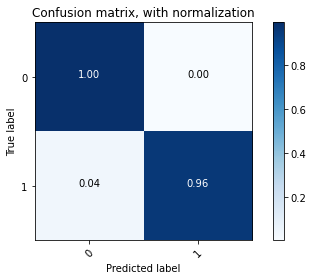

In [60]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, with normalization')

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
scores(clf)

Accuracy:  0.9952
Recall: 0.9706422018348624
F1 score: 0.9346
Precision: 0.8757638864322886


In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) #Метод опорных векторов
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [70]:
scores(clf)

Accuracy:  0.9917
Recall: 0.9486238532110092
F1 score: 0.8891
Precision: 0.795389574970619


Normalized confusion matrix


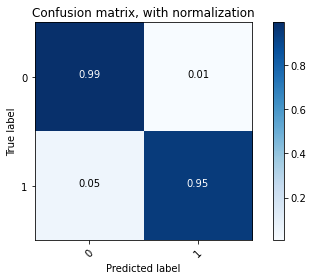

In [71]:
y_true = y_test
y_pred =  clf.predict(X_test)

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, with normalization')

# VARIOUS TESTS

In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ВКР/proga/DATA/insub_corpora/full_insubordination.csv')

In [3]:
eval(data['dependence_structure'][0])

[[{'deprel': 'mark',
   'head': 6,
   'id': 1,
   'lemma': 'parce',
   'misc': 'start_char=0|end_char=5',
   'ner': 'O',
   'text': 'Parce',
   'upos': 'ADV'},
  {'deprel': 'fixed',
   'head': 1,
   'id': 2,
   'lemma': 'que',
   'misc': 'start_char=6|end_char=9',
   'ner': 'O',
   'text': 'que',
   'upos': 'SCONJ'},
  {'deprel': 'det',
   'feats': 'Number=Plur|PossNumber=Sing|PossPerson=1|PronType=Prs',
   'head': 4,
   'id': 3,
   'lemma': 'son',
   'misc': 'start_char=10|end_char=13',
   'ner': 'O',
   'text': 'mes',
   'upos': 'DET'},
  {'deprel': 'nsubj',
   'feats': 'Gender=Masc|Number=Plur',
   'head': 6,
   'id': 4,
   'lemma': 'parent',
   'misc': 'start_char=14|end_char=21',
   'ner': 'O',
   'text': 'parents',
   'upos': 'NOUN'},
  {'deprel': 'obl:arg',
   'feats': 'Gender=Masc|Number=Sing|Person=3|PronType=Prs',
   'head': 6,
   'id': 5,
   'lemma': 'lui',
   'misc': 'start_char=22|end_char=25',
   'ner': 'O',
   'text': 'lui',
   'upos': 'PRON'},
  {'deprel': 'root',
   'f

In [26]:
import stanza
#nlp = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma,depparse')
doc = nlp_stanza(' Si tu savais ce que moi j’étais contente tu serais étonné!')
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

id: 1	word: Si	head id: 3	head: savais	deprel: mark
id: 2	word: tu	head id: 3	head: savais	deprel: nsubj
id: 3	word: savais	head id: 12	head: étonné	deprel: advcl
id: 4	word: ce	head id: 3	head: savais	deprel: obj
id: 5	word: que	head id: 9	head: contente	deprel: mark
id: 6	word: moi	head id: 9	head: contente	deprel: obl:arg
id: 7	word: j’	head id: 9	head: contente	deprel: nsubj
id: 8	word: étais	head id: 9	head: contente	deprel: cop
id: 9	word: contente	head id: 4	head: ce	deprel: acl:relcl
id: 10	word: tu	head id: 12	head: étonné	deprel: nsubj
id: 11	word: serais	head id: 12	head: étonné	deprel: aux:pass
id: 12	word: étonné	head id: 0	head: root	deprel: root
id: 13	word: !	head id: 12	head: étonné	deprel: punct


In [24]:
import stanza
#nlp = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma,depparse')
doc = nlp_stanza(' Si tu savais ce que moi j’étais contente!')
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

id: 1	word: Si	head id: 3	head: savais	deprel: mark
id: 2	word: tu	head id: 3	head: savais	deprel: nsubj
id: 3	word: savais	head id: 9	head: contente	deprel: advcl
id: 4	word: ce	head id: 3	head: savais	deprel: obj
id: 5	word: que	head id: 9	head: contente	deprel: mark
id: 6	word: moi	head id: 9	head: contente	deprel: obl:arg
id: 7	word: j’	head id: 9	head: contente	deprel: nsubj
id: 8	word: étais	head id: 9	head: contente	deprel: cop
id: 9	word: contente	head id: 0	head: root	deprel: root
id: 10	word: !	head id: 9	head: contente	deprel: punct


In [8]:
import stanza
from stanza.utils.conll import CoNLL

dicts = [[{'id': '1', 'text': 'Test', 'upos': 'NOUN', 'xpos': 'NN', 'feats': 'Number=Sing', 'misc': 'start_char=0|end_char=4'}, {'id': '2', 'text': 'sentence', 'upos': 'NOUN', 'xpos': 'NN', 'feats': 'Number=Sing', 'misc': 'start_char=5|end_char=13'}, {'id': '3', 'text': '.', 'upos': 'PUNCT', 'xpos': '.', 'misc': 'start_char=13|end_char=14'}]] # dicts is List[List[Dict]], representing each token / word in each sentence in the document
conll = CoNLL.convert_dict(eval(data['dependence_structure'][0])) 
conll

[[['1',
   'Parce',
   'parce',
   'ADV',
   '_',
   '_',
   '6',
   'mark',
   '_',
   'start_char=0|end_char=5'],
  ['2',
   'que',
   'que',
   'SCONJ',
   '_',
   '_',
   '1',
   'fixed',
   '_',
   'start_char=6|end_char=9'],
  ['3',
   'mes',
   'son',
   'DET',
   '_',
   'Number=Plur|PossNumber=Sing|PossPerson=1|PronType=Prs',
   '4',
   'det',
   '_',
   'start_char=10|end_char=13'],
  ['4',
   'parents',
   'parent',
   'NOUN',
   '_',
   'Gender=Masc|Number=Plur',
   '6',
   'nsubj',
   '_',
   'start_char=14|end_char=21'],
  ['5',
   'lui',
   'lui',
   'PRON',
   '_',
   'Gender=Masc|Number=Sing|Person=3|PronType=Prs',
   '6',
   'obl:arg',
   '_',
   'start_char=22|end_char=25'],
  ['6',
   'donnent',
   'donner',
   'VERB',
   '_',
   'Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin',
   '0',
   'root',
   '_',
   'start_char=26|end_char=33'],
  ['7',
   'le',
   'le',
   'DET',
   '_',
   'Definite=Def|Gender=Masc|Number=Sing|PronType=Art',
   '9',
   'det',
   '_

In [12]:
text = 'Qu\'il vienne bien vite!'
doc = nlp_stanza(text)
list_doc = doc.to_dict()

from stanza.utils.conll import CoNLL
conll = CoNLL.convert_dict(list_doc)

In [14]:
conll

[[['1',
   "Qu'",
   'que',
   'SCONJ',
   '_',
   '_',
   '3',
   'mark',
   '_',
   'start_char=0|end_char=3'],
  ['2',
   'il',
   'il',
   'PRON',
   '_',
   'Gender=Masc|Number=Sing|Person=3|PronType=Prs',
   '3',
   'nsubj',
   '_',
   'start_char=3|end_char=5'],
  ['3',
   'vienne',
   'venir',
   'VERB',
   '_',
   'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin',
   '0',
   'root',
   '_',
   'start_char=6|end_char=12'],
  ['4',
   'bien',
   'bien',
   'ADV',
   '_',
   '_',
   '5',
   'advmod',
   '_',
   'start_char=13|end_char=17'],
  ['5',
   'vite',
   'vite',
   'ADV',
   '_',
   '_',
   '3',
   'advmod',
   '_',
   'start_char=18|end_char=22'],
  ['6',
   '!',
   '!',
   'PUNCT',
   '_',
   '_',
   '3',
   'punct',
   '_',
   'start_char=22|end_char=23']]]